In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom
from scipy.optimize import curve_fit
from scipy.stats import kstest
from scipy.stats import nbinom, kstest
from scipy.optimize import curve_fit
import math
pd.options.mode.chained_assignment = None

In [6]:
df = pd.read_csv('inventory.csv')

# What is the demand pattern(s) that you identified?

In [7]:
df1=df[['Day','Demand']]

In [8]:
df1 = pd.DataFrame(df1)
df1['Day'] = pd.to_datetime(df1['Day'])

# Create a subset of the dataframe between January 1, 2019 and October 31, 2019
regular_2019 = df1[(df1['Day'] >= '2019-01-01') & (df1['Day'] <= '2019-10-31')]
peak_2019 = df1[(df1['Day'] >= '2019-11-01') & (df1['Day'] <= '2019-12-31')]
regular_2020 = df1[(df1['Day'] >= '2020-01-01') & (df1['Day'] <= '2020-10-31')]
peak_2020 = df1[(df1['Day'] >= '2020-11-01') & (df1['Day'] <= '2020-12-31')]
regular_2021 = df1[(df1['Day'] >= '2021-01-01') & (df1['Day'] <= '2021-10-31')]
peak_2021 = df1[(df1['Day'] >= '2021-11-01') & (df1['Day'] <= '2021-12-31')]

### Year 2019 Month 01-10

In [9]:
regular_2019['Demand'].mean()

245.03947368421052

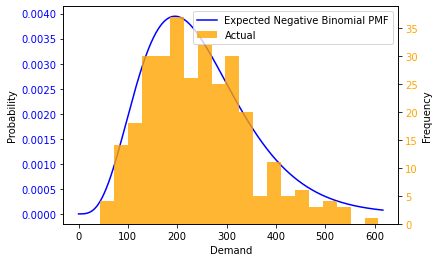

In [10]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, regular_2019['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(regular_2019['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()


### Year 2019 Month 11-12

In [11]:
#expected should be 245+70=315
peak_2019['Demand'].mean()

282.78688524590166

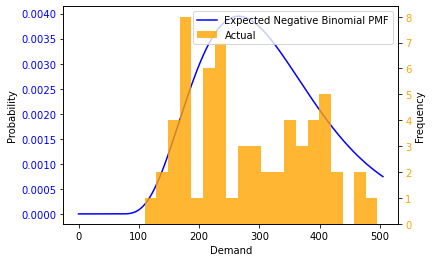

In [12]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, peak_2019['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values-70, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(peak_2019['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

### Year 2020 Month 01-10

In [13]:
#expected should be 245+10=255
regular_2020['Demand'].mean()

257.1704918032787

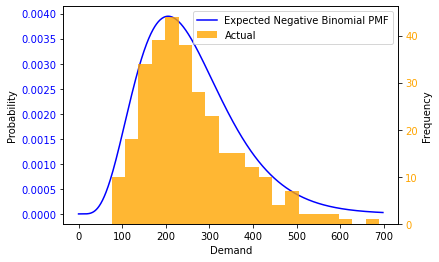

In [14]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, regular_2020['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values-10, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(regular_2020['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

### Year 2020 Month 11-12

In [15]:
#expected should be 245+10+70=325
peak_2020['Demand'].mean()

330.9344262295082

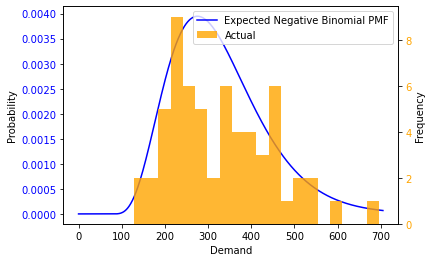

In [16]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, peak_2020['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values-10-70, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(peak_2020['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

### Year 2021 Month 01-10

In [17]:
#expected should be 245+10+10=265
regular_2021['Demand'].mean()

279.2993421052632

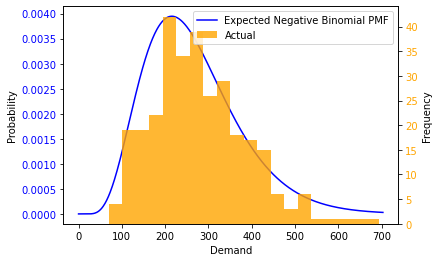

In [18]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, regular_2021['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values-10-10, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(regular_2021['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

### Year 2021 Month 11-12

In [19]:
#expected should be 245+10+10+70=335
peak_2021['Demand'].mean()

359.8196721311475

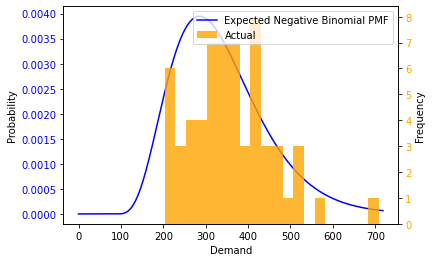

In [20]:
n = 5
p = 0.02

# create an array of k values
k_values = np.arange(0, peak_2021['Demand'].max()+10)

# calculate the pmf for the negative binomial distribution
pmf_values = nbinom.pmf(k_values-10-10-70, n, p)

# create a new figure with two subplots
fig, ax1 = plt.subplots()

# plot the pmf of the negative binomial distribution on the first subplot
ax1.plot(k_values, pmf_values, color='blue', label='Expected Negative Binomial PMF')
ax1.set_xlabel('Demand')
ax1.set_ylabel('Probability')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the histogram
ax2 = ax1.twinx()

# plot the histogram of the subset_df on the second subplot
ax2.hist(peak_2021['Demand'], bins=20, alpha=0.8, color='orange', label='Actual')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show the plot
plt.show()

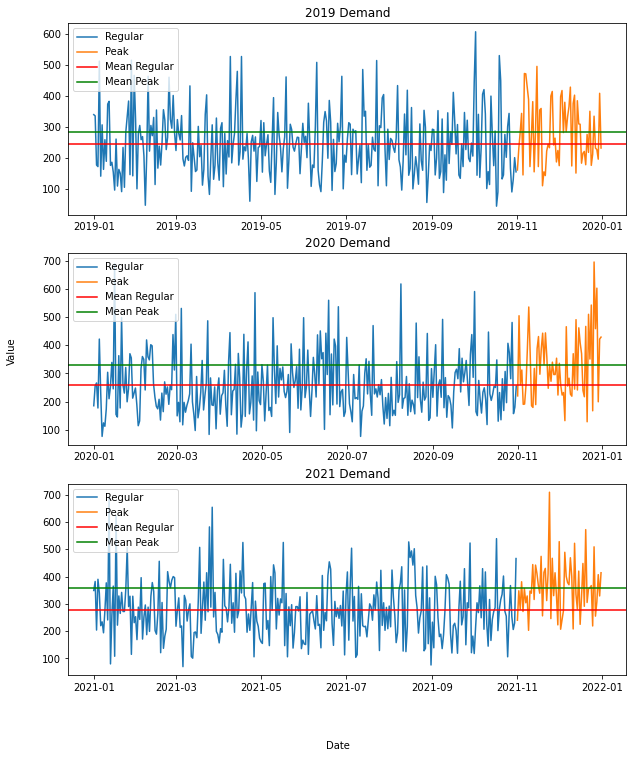

In [21]:
# Create a figure and axis object
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot the time series data
y1=regular_2019['Demand']
y2=peak_2019['Demand']
y3=regular_2020['Demand']
y4=peak_2020['Demand']
y5=regular_2021['Demand']
y6=peak_2021['Demand']

x1=regular_2019['Day']
x2=peak_2019['Day']
x3=regular_2020['Day']
x4=peak_2020['Day']
x5=regular_2021['Day']
x6=peak_2021['Day']

# Calculate the mean values
mean1 = y1.mean()
mean2 = y2.mean()
mean3 = y3.mean()
mean4 = y4.mean()
mean5 = y5.mean()
mean6 = y6.mean()

# Add the time series data and mean lines to each subplot
axes[0].plot(x1, y1)
axes[0].plot(x2, y2)
axes[0].axhline(mean1, color='r')
axes[0].axhline(mean2, color='g')
axes[0].set_title('2019 Demand')
axes[0].legend(['Regular', 'Peak', 'Mean Regular', 'Mean Peak'], loc='upper left')

axes[1].plot(x3, y3)
axes[1].plot(x4, y4)
axes[1].axhline(mean3, color='r')
axes[1].axhline(mean4, color='g')
axes[1].set_title('2020 Demand')
axes[1].legend(['Regular', 'Peak', 'Mean Regular', 'Mean Peak'], loc='upper left')

axes[2].plot(x5, y5)
axes[2].plot(x6, y6)
axes[2].axhline(mean5, color='r')
axes[2].axhline(mean6, color='g')
axes[2].set_title('2021 Demand')
axes[2].legend(['Regular', 'Peak', 'Mean Regular', 'Mean Peak'], loc='upper left')

# Set axis labels and title
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')

# Display the plot
plt.show()


# What is the current inventory policy that the company implements?

In [22]:
df['Inventory_last'] = df['Inventory'].shift(1)
df['new_order'] = df['Inventory'] - df['Inventory_last'] + df['Demand'] # add back the demand, to get ther inventory in the morning and substract yestoday's inventory at the end of the day
order_day = df.loc[df['new_order'] != 0]
order_day

,Day,Demand,Inventory,Inventory_last,new_order
0,1/1/2019,340,4660,NaN,NaN
9,1/10/2019,189,10553,2592.0,8150.0
40,2/10/2019,222,11264,3336.0,8150.0
68,3/10/2019,192,11874,3916.0,8150.0
99,4/10/2019,184,12969,5003.0,8150.0
129,5/10/2019,395,13559,5804.0,8150.0
160,6/10/2019,509,14037,6396.0,8150.0
190,7/10/2019,197,14990,7037.0,8150.0
221,8/10/2019,96,15162,7108.0,8150.0
252,9/10/2019,210,16572,8632.0,8150.0


# Is the current inventory policy sustainable? That is, what would happen in terms of expected profits and costs in the next year (assume 2022 for simplicity) if the company continued implementing it, assuming demand trends remain the same?

In [23]:
n = 5
p = 0.02

regular_2022= nbinom.rvs(n, p, size=365-61)+10+10+10

In [24]:
n = 5
p = 0.02

peak_2022= nbinom.rvs(n, p, size=61)+10+10+10+70

In [25]:
# Define the start and end dates
start_date = '2022-01-01'
end_date = '2022-12-31'

# Create a date range using pd.date_range()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert the date_range to a list
day_of_year = date_range.strftime('%Y-%m-%d').tolist()

In [26]:
demand_2022 = pd.DataFrame(np.concatenate([regular_2022, peak_2022]),columns=['demand'])
demand_2022['day']=day_of_year
demand_2022 = demand_2022[['day','demand']]
demand_2022.rename(columns = {'day':'Day','demand':'Demand'},inplace = True)
demand_2022

,Day,Demand
0,2022-01-01,276
1,2022-01-02,193
2,2022-01-03,438
3,2022-01-04,389
4,2022-01-05,453
...,...,...
360,2022-12-27,370
361,2022-12-28,284
362,2022-12-29,319
363,2022-12-30,469


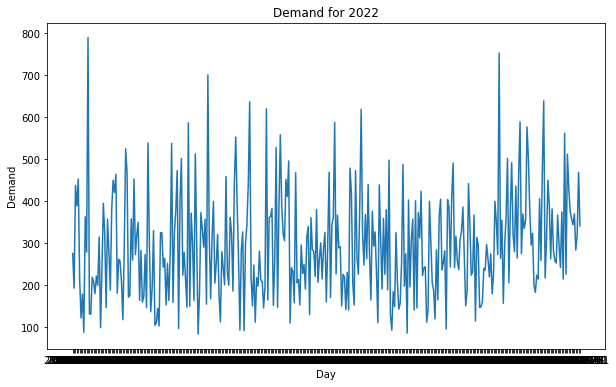

In [27]:
# Plot the time series data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(demand_2022['Day'],demand_2022['Demand'])
ax.set_xlabel('Day')
ax.set_ylabel('Demand')
ax.set_title('Demand for 2022')

plt.show()

In [28]:
df2022 = demand_2022
df2022['Day']=pd.to_datetime(df2022['Day'])

In [29]:
df2022

,Day,Demand
0,2022-01-01,276
1,2022-01-02,193
2,2022-01-03,438
3,2022-01-04,389
4,2022-01-05,453
...,...,...
360,2022-12-27,370
361,2022-12-28,284
362,2022-12-29,319
363,2022-12-30,469


Given 12/31/2021,414,1178, the inventory_start of 2022 is 1178

In [30]:
df2022['Inventory'] = 0

df2022['Inventory_t-1'] = 0

df2022['New_Order_Arrive'] = 0

df2022.iloc[0, 3] = 1178

df2022

,Day,Demand,Inventory,Inventory_t-1,New_Order_Arrive
0,2022-01-01,276,0,1178,0
1,2022-01-02,193,0,0,0
2,2022-01-03,438,0,0,0
3,2022-01-04,389,0,0,0
4,2022-01-05,453,0,0,0
...,...,...,...,...,...
360,2022-12-27,370,0,0,0
361,2022-12-28,284,0,0,0
362,2022-12-29,319,0,0,0
363,2022-12-30,469,0,0,0


In [31]:
inventory_start= 1178
df2022['Inventory'] = 0
#df2022['loss demand'] = 0
df2022.loc[0,'Inventory'] = inventory_start - df2022.loc[0,'Demand'] # the inventory at the end of the day (1178-118)
for i in range(1,len(df2022)):
    prev_left = df2022.loc[i-1,'Inventory']
    daily_demand = df2022.loc[i,'Demand']
    left_inventory = prev_left - daily_demand  # the inventory at the end of the day
    if df2022.loc[i,'Day'].day ==10:
        left_inventory += 8150 # we order 8150 units each time at the end of the 1st day of each month and arrive on the 10th day's morning
        df2022.loc[i, 'New_Order_Arrive'] = 8150
    if left_inventory < 0:
        df2022.loc[i,'Inventory'] = 0 # there exists demand loss
        #df2022.loc[i,'loss demand'] = abs(left_inventory)
    else:
        df2022.loc[i,'Inventory'] = left_inventory 
    df2022.loc[i,'Inventory_t-1'] = prev_left


In [32]:
df2022.head(50)

,Day,Demand,Inventory,Inventory_t-1,New_Order_Arrive
0,2022-01-01,276,902,1178,0
1,2022-01-02,193,709,902,0
2,2022-01-03,438,271,709,0
3,2022-01-04,389,0,271,0
4,2022-01-05,453,0,0,0
5,2022-01-06,213,0,0,0
6,2022-01-07,122,0,0,0
7,2022-01-08,179,0,0,0
8,2022-01-09,88,0,0,0
9,2022-01-10,363,7787,0,8150


In [33]:
def cost_profit(data):
    
    data['Inventory_Cost'] = 0

    data['Production_Cost'] = 0

    data['Loss_Profit'] = 0

    data['Sales'] = 0

    data['Profit'] = 0
    
    for i in range(0,len(data)):
    
        data.loc[i,'Inventory_Cost'] = data.iloc[i]['Inventory'] * 0.25
    
        if data.iloc[i]['New_Order_Arrive']>0:
            data.loc[i,'Production_Cost'] = data.iloc[i]['New_Order_Arrive'] * 1.5 + 1200
        
        if data.iloc[i]['Demand'] - (data.iloc[i]['Inventory_t-1'] + data.iloc[i]['New_Order_Arrive']) >0:
            data.loc[i, 'Loss_Profit'] = (data.iloc[i]['Demand'] - (data.iloc[i]['Inventory_t-1'] + data.iloc[i]['New_Order_Arrive']))*(35.5-1.5)
        
        data.loc[i, 'Sales'] = min(data.iloc[i]['Demand'], (data.iloc[i]['Inventory_t-1'] + data.iloc[i]['New_Order_Arrive'])) * 35.5
    
        data.loc[i, 'Profit'] = data.iloc[i]['Sales'] - data.iloc[i]['Inventory_Cost'] \
                            - data.iloc[i]['Production_Cost'] - data.iloc[i]['Loss_Profit']
        
    return data

In [34]:
df2022 = cost_profit(df2022)
df2022

,Day,Demand,Inventory,Inventory_t-1,New_Order_Arrive,Inventory_Cost,Production_Cost,Loss_Profit,Sales,Profit
0,2022-01-01,276,902,1178,0,225.50,0,0,9798.0,9572.50
1,2022-01-02,193,709,902,0,177.25,0,0,6851.5,6674.25
2,2022-01-03,438,271,709,0,67.75,0,0,15549.0,15481.25
3,2022-01-04,389,0,271,0,0.00,0,4012,9620.5,5608.50
4,2022-01-05,453,0,0,0,0.00,0,15402,0.0,-15402.00
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,370,2042,2412,0,510.50,0,0,13135.0,12624.50
361,2022-12-28,284,1758,2042,0,439.50,0,0,10082.0,9642.50
362,2022-12-29,319,1439,1758,0,359.75,0,0,11324.5,10964.75
363,2022-12-30,469,970,1439,0,242.50,0,0,16649.5,16407.00


In [35]:
q3 = df2022.Profit.sum()
q3

2684575.25

# What would be the differences in profit and costs if the firm had implemented the EOQ policy in previous years (2019-2021)? Make sure that you outline how profits/costs are changing per year. Are they better than the current policy? What are the trade-offs?

In [36]:
df2022

,Day,Demand,Inventory,Inventory_t-1,New_Order_Arrive,Inventory_Cost,Production_Cost,Loss_Profit,Sales,Profit
0,2022-01-01,276,902,1178,0,225.50,0,0,9798.0,9572.50
1,2022-01-02,193,709,902,0,177.25,0,0,6851.5,6674.25
2,2022-01-03,438,271,709,0,67.75,0,0,15549.0,15481.25
3,2022-01-04,389,0,271,0,0.00,0,4012,9620.5,5608.50
4,2022-01-05,453,0,0,0,0.00,0,15402,0.0,-15402.00
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,370,2042,2412,0,510.50,0,0,13135.0,12624.50
361,2022-12-28,284,1758,2042,0,439.50,0,0,10082.0,9642.50
362,2022-12-29,319,1439,1758,0,359.75,0,0,11324.5,10964.75
363,2022-12-30,469,970,1439,0,242.50,0,0,16649.5,16407.00


In [37]:
# Read data
df = pd.read_csv("inventory.csv", parse_dates=['Day'])
df

,Day,Demand,Inventory
0,2019-01-01,340,4660
1,2019-01-02,336,4324
2,2019-01-03,177,4147
3,2019-01-04,172,3975
4,2019-01-05,513,3462
...,...,...,...
1091,2021-12-27,255,2636
1092,2021-12-28,308,2328
1093,2021-12-29,407,1921
1094,2021-12-30,329,1592


In [38]:
S = 1200 # set up cost per order
H = 365 * 0.25 # holding cost per unit per year

def calculate_EOQ(df, year):
    subdf = df[df.Day.dt.year == year]
    D = subdf['Demand'].sum() # total demand of a year
    Q = math.sqrt((2*D*S)/H)
    return np.ceil(Q)

In [39]:
calculate_EOQ(df, 2019)

1554.0

In [40]:
calculate_EOQ(df, 2020)

1611.0

In [41]:
calculate_EOQ(df, 2021)

1677.0

In [42]:
def calculate_ROP(df, year, alpha):
    subdf = df[df.Day.dt.year == year]
    
    # Create a new column in the DataFrame to store the rolling sum of demand for every 9 days
    subdf['Demand_9_Days'] = subdf['Demand'].rolling(window=9, min_periods=1).sum()
    
    Demand_9 = subdf['Demand_9_Days'][8:].to_list()
    
    # Calculate the 95th percentile
    percentile_95 = np.percentile(Demand_9, alpha)
    
    return percentile_95

In [43]:
calculate_ROP(df, 2019, 95)

2898.0

In [44]:
calculate_ROP(df, 2020, 95)

3110.45

In [45]:
calculate_ROP(df, 2021, 95)

3428.7999999999997

## EOQ: Calculate Profit and Cost

### 2019 Profit Cost

In [46]:
def EOQ(df, initial, alpha):
    
    if 'Inventory' in df.columns:
        df.drop(columns = ['Inventory'], inplace = True)

    df['Inventory'] = 0

    df['Inventory_t-1'] = 0

    df['New_Order_Placement'] = 0

    df['New_Order_Arrive'] = 0

    df['Expected_Inventory'] = 0

    df['Expected_Inventory_t-1'] = 0

    df.iloc[0, 3] = initial

    df.iloc[0, -1] = initial

    for i in range(len(df)):
    
        df.iloc[i,2] = max(df.iloc[i,3] - df.iloc[i,1] + df.iloc[i,5],0) #Inventory update
        df.iloc[i,6] = max(df.iloc[i,-1] - df.iloc[i,1] + df.iloc[i,4],0) #Expected_Inventory update
    
        
        if (df.iloc[i,6] <= calculate_ROP(df, df.iloc[i,0].year, alpha)) and (i < len(df)-9):
        
            df.iloc[i,4] = calculate_EOQ(df, df.iloc[i,0].year) # Place Order in New_Order
            df.iloc[i+9,5] = calculate_EOQ(df, df.iloc[i,0].year) # Add to inventory when order arrived
            df.iloc[i,6] += df.iloc[i,4]
        
        if i < len(df)-1:
        
            df.iloc[i+1,3] = df.iloc[i,2] # Inventory t-1 update
            df.iloc[i+1,-1] = df.iloc[i,-2] # Expected inventory t-1 update
            
    df = cost_profit(df)
    
    return df

In [47]:
df_q4 = EOQ(df, 5000, 95)
df_q4

,Day,Demand,Inventory,Inventory_t-1,New_Order_Placement,New_Order_Arrive,Expected_Inventory,Expected_Inventory_t-1,Inventory_Cost,Production_Cost,Loss_Profit,Sales,Profit
0,2019-01-01,340,4660,5000,0,0,4660,5000,1165.00,0.0,0,12070.0,10905.00
1,2019-01-02,336,4324,4660,0,0,4324,4660,1081.00,0.0,0,11928.0,10847.00
2,2019-01-03,177,4147,4324,0,0,4147,4324,1036.75,0.0,0,6283.5,5246.75
3,2019-01-04,172,3975,4147,0,0,3975,4147,993.75,0.0,0,6106.0,5112.25
4,2019-01-05,513,3462,3975,0,0,3462,3975,865.50,0.0,0,18211.5,17346.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,255,2293,871,0,1677,3224,3479,573.25,3715.5,0,9052.5,4763.75
1092,2021-12-28,308,1985,2293,0,0,2916,3224,496.25,0.0,0,10934.0,10437.75
1093,2021-12-29,407,1578,1985,0,0,2509,2916,394.50,0.0,0,14448.5,14054.00
1094,2021-12-30,329,1249,1578,0,0,2180,2509,312.25,0.0,0,11679.5,11367.25


In [48]:
pd.options.display.float_format = '{:.2f}'.format
df_q4.rename(columns = {'Profit':'EOQ_Profit'}, inplace = True)
eoq = df_q4.groupby(df_q4.Day.dt.year)['EOQ_Profit'].sum()
eoq

Day
2019   2907988.00
2020   3092460.25
2021   3337672.00
Name: EOQ_Profit, dtype: float64

In [49]:
df = pd.read_csv("inventory.csv", parse_dates=['Day'])

df['Inventory'] = 0

df['Inventory_t-1'] = 0

df['New_Order_Arrive'] = 0

df.iloc[0, 3] = 5000

inventory_start= 5000
df['Inventory'] = 0
#df2022['loss demand'] = 0
df.loc[0,'Inventory'] = inventory_start - df.loc[0,'Demand']
for i in range(1,len(df)):
    prev_left = df.loc[i-1,'Inventory']
    daily_demand = df.loc[i,'Demand']
    left_inventory = prev_left - daily_demand
    if df.loc[i,'Day'].day ==10:
        left_inventory += 8150
        df.loc[i, 'New_Order_Arrive'] = 8150
    if left_inventory < 0:
        df.loc[i,'Inventory'] = 0
        #df2022.loc[i,'loss demand'] = abs(left_inventory)
    else:
        df.loc[i,'Inventory'] = left_inventory 
    df.loc[i,'Inventory_t-1'] = prev_left

df = cost_profit(df)
df.rename(columns = {'Profit':'Monthly_Profit'}, inplace = True)
monthly = df.groupby(df.Day.dt.year)['Monthly_Profit'].sum()
monthly

Day
2019   2138869.75
2020   2027037.75
2021   2800538.00
Name: Monthly_Profit, dtype: float64

In [50]:
q4 = pd.concat([monthly, eoq],axis = 1)
q4

,Monthly_Profit,EOQ_Profit
Day,,
2019,2138869.75,2907988.00
2020,2027037.75,3092460.25
2021,2800538.00,3337672.00


The continuous-review inventory system is generally considered more efficient than the monthly single-period system, as it allows for better control of inventory levels and can reduce the risk of stockouts. However, in certain scenarios, the continuous-review system may perform worse than the monthly system in terms of profitability.

One scenario where the continuous-review system may perform worse is when the cost of setup and production is high relative to the profit margin of the product. In the given scenario, the batch process costs $1,200 to set up, plus $1.50 per unit produced. This means that the cost of producing each unit is relatively high compared to the profit margin of 35.50 per unit. Additionally, the batch takes nine days to complete, during which time the products cannot be sold and incur a storage cost of $0.25 per unit per day.

In this case, if the continuous-review system is used to maintain a high inventory level, the company may incur significant setup and production costs without being able to sell all of the inventory before it becomes outdated or stale. This could lead to a decrease in profitability and a higher risk of losses.

On the other hand, the monthly single-period system allows for more flexibility in production and inventory management, as batches can be produced and sold according to demand without incurring high setup and production costs. This can be particularly advantageous in scenarios where the demand for the product is uncertain or seasonal.

Overall, the choice between the continuous-review and monthly single-period systems depends on various factors, including the cost of production and setup, the demand for the product, and the desired level of inventory control.

# Analogously to previous question, what would be the expected profit and costs in 2022 with an EOQ policy?

In [51]:
df = df2022[['Day', 'Demand', 'Inventory']]

df_q5 = EOQ(df, 1178, 95)

df_q5.rename(columns = {'Profit':'EOQ_Profit'}, inplace = True)
eoq = df_q5.groupby(df_q5.Day.dt.year)['EOQ_Profit'].sum()
eoq

Day
2022   3231166.50
Name: EOQ_Profit, dtype: float64

In [52]:
pd.options.display.float_format = '{:.2f}'.format
q5 = pd.DataFrame(eoq)
q5['Monthly_Profit'] = q3
q5 = q5[['Monthly_Profit', 'EOQ_Profit']]
q5

,Monthly_Profit,EOQ_Profit
Day,,
2022,2684575.25,3231166.50


# Evaluate the profits and costs for different levels of stockout risks.

 In the given statement, the cost includes the production cost and setup cost, which should be a part of the calculation of profit. Additionally, profit loss should not be included in the cost calculation as it is a component of the profit. A more accurate statement would be:

The cost includes the production cost and setup cost.
The profit is calculated by subtracting the total cost (including production cost and setup cost) and any profit loss from the total sales.

In [53]:
alpha = list(range(80, 101, 2))
profit = []
cost = []

for i in alpha:
    df = pd.concat([df_q4, df_q5],ignore_index=True)
    df = df[['Day', 'Demand']] 
    df = EOQ(df, 5000, i) #def EOQ(df, initial, alpha):
    profit.append(df.Profit.sum())
    df['tot_cost'] = df['Inventory_Cost'] + df['Production_Cost'] + df['Loss_Profit']
    cost.append(df['tot_cost'].sum())


df_q6 = pd.DataFrame(columns = ['Risk', 'Profit', 'Cost'])
df_q6['Risk'] = alpha
df_q6['Profit'] = profit
df_q6['Cost'] = cost

In [54]:
df_q6

,Risk,Profit,Cost
0,80,12747311.75,1568063.25
1,82,12738698.25,1576676.75
2,84,12765530.00,1555880.00
3,86,12745364.50,1576045.50
4,88,12733958.75,1587451.25
5,90,12722453.00,1598957.00
6,92,12715530.25,1605879.75
7,94,12701210.75,1620199.25
8,96,12691987.25,1629422.75
9,98,12708811.75,1620124.25


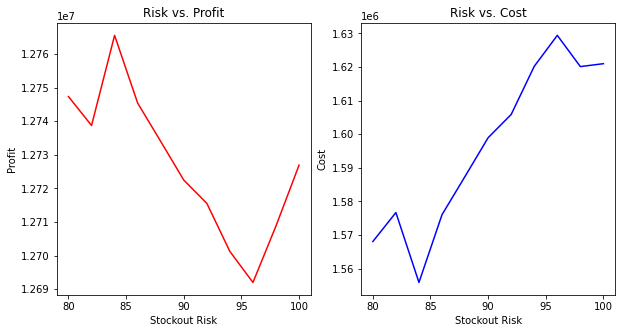

In [55]:
import matplotlib.pyplot as plt

# create a figure and two subplots for risk vs. profit and risk vs. cost
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot risk vs. profit
ax1.plot(df_q6['Risk'], df_q6['Profit'], color='red')
ax1.set_xlabel('Stockout Risk')
ax1.set_ylabel('Profit')
ax1.set_title('Risk vs. Profit')

# plot risk vs. cost
ax2.plot(df_q6['Risk'], df_q6['Cost'], color='blue')
ax2.set_xlabel('Stockout Risk')
ax2.set_ylabel('Cost')
ax2.set_title('Risk vs. Cost')

# display the plot
plt.show()

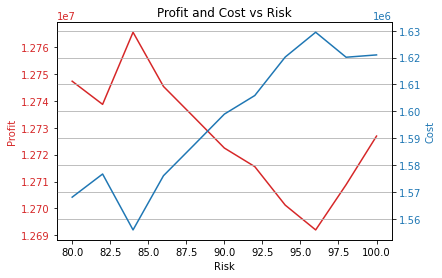

In [56]:
risk = df_q6.Risk.to_list()
profit = df_q6.Profit.to_list()
cost = df_q6.Cost.to_list()

# Create the figure and axes objects
fig, ax1 = plt.subplots()

# Plot the data on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Risk')
ax1.set_ylabel('Profit', color=color)
ax1.plot(risk, profit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis with the same x-axis
ax2 = ax1.twinx()

# Plot the data on the second y-axis
color = 'tab:blue'
ax2.set_ylabel('Cost', color=color)
ax2.plot(risk, cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and gridlines
plt.title('Profit and Cost vs Risk')
plt.grid(axis='y')

# Show the plot
plt.show()

Holding cost is high becasuse holding cost

The opposite trends in "risk vs. profit" and "risk vs. cost" mean that as the level of stockout risk increases, the potential profits decrease while the costs increase. This makes sense because as the level of stockout risk increases, there is a higher likelihood of lost sales due to unfulfilled demand, which leads to lower profits. Additionally, as the level of stockout risk increases, the costs of managing stockouts, such as expedited shipping or emergency production runs, increase, leading to higher costs.

The turbulence between two ranges in "risk vs. cost" may suggest that there is an optimal level of stockout risk that minimizes costs. At very low levels of stockout risk, the costs of maintaining high inventory levels may outweigh the costs of stockouts. At very high levels of stockout risk, the costs of managing stockouts may become prohibitively high. Therefore, there may be an optimal level of stockout risk that balances the costs of maintaining inventory and managing stockouts.

To form resilient supply chains, this observation illustrates the trade-offs that companies must make between maximizing profits and minimizing costs. Resilient supply chains require companies to balance these trade-offs and find the optimal level of stockout risk that balances the costs and benefits of maintaining inventory levels and managing stockouts. 

# More flexible model

In [57]:
df_7 = df.copy()

In [58]:
df_7.head()

,Day,Demand,Inventory,Inventory_t-1,New_Order_Placement,New_Order_Arrive,Expected_Inventory,Expected_Inventory_t-1,Inventory_Cost,Production_Cost,Loss_Profit,Sales,Profit,tot_cost
0,2019-01-01,340,4660,5000,0,0,4660,5000,1165.00,0.00,0,12070.00,10905.00,1165.00
1,2019-01-02,336,4324,4660,0,0,4324,4660,1081.00,0.00,0,11928.00,10847.00,1081.00
2,2019-01-03,177,4147,4324,0,0,4147,4324,1036.75,0.00,0,6283.50,5246.75,1036.75
3,2019-01-04,172,3975,4147,0,0,3975,4147,993.75,0.00,0,6106.00,5112.25,993.75
4,2019-01-05,513,3462,3975,0,0,3462,3975,865.50,0.00,0,18211.50,17346.00,865.50


Propose 1:

To build a linear programming model, we need to define decision variables, objective function, and constraints. Here's how we can formulate the LP model based on the given information:

Decision variables:

Production quantity at time t: P_t
Objective function:

Maximize profit over the planning horizon
maximize Σₜ (35.50 × S_t - 1.50 × P_t - 1200)

where S_t is the sales quantity at time t, 35.50 is the profit per unit sold, 1.50 is the production cost per unit, and 1200 is the setup cost per batch.

Constraints:

Inventory balance constraint
Inventory_t = Inventory_t-1 + P_t - S_t, where Inventory_t is the inventory level at time t.

Production capacity constraint
P_t <= Production_Capacity, where Production_Capacity is the maximum production capacity per batch.

Non-negativity constraint
P_t >= 0, Inventory_t >= 0

Demand constraint
S_t >= demand_t, where demand_t is the total demand at time t, including both the base demand and any seasonal or contractual increases.

Lead time constraint
Inventory_t >= 0.25 × (9 - (t - t_mod 9)) × S_t, where t_mod 9 is the remainder when t is divided by 9. This constraint ensures that the inventory level is sufficient to cover the demand during the lead time of 9 days for each batch.

Note that the above LP model assumes that we can produce any quantity of units in any time period, as long as we satisfy the production capacity constraint. We can use a linear programming solver such as PuLP or Gurobi to solve this model and determine the optimal production plan over the planning horizon.

Propose 2:

For the 6 periods: 2019 1-10 2019 11, 12; 2020 1-10 2020 11,12; 2021 1-10 2021 11,12.   We set different EOQ model for these 6 periods respectively.

ROP for regular month in the 3 years

In [59]:
df_2019JtoO = df_7[(df_7['Day'] >= '2019-01-01') & (df_7['Day'] <= '2019-10-31')] # df_January to October

In [60]:
calculate_ROP(df_2019JtoO, 2019, 95)

2729.5

In [61]:
df_2020JtoO = df_7[(df_7['Day'] >= '2020-01-01') & (df_7['Day'] <= '2020-10-31')] # df_January to October

In [62]:
calculate_ROP(df_2020JtoO, 2020, 95)

2927.4

In [63]:
df_2021JtoO = df_7[(df_7['Day'] >= '2021-01-01') & (df_7['Day'] <= '2021-10-31')] # df_January to October

In [64]:
calculate_ROP(df_2021JtoO, 2021, 95)

3166.0

ROP for peak month in the 3 years

In [65]:
df_2019_peak = df_7[(df_7['Day'] >= '2019-11-01') & (df['Day'] <= '2019-12-31')] 

In [66]:
calculate_ROP(df_2019_peak, 2019, 95)

3056.6

In [67]:
df_2020_peak = df_7[(df_7['Day'] >= '2020-11-01') & (df_7['Day'] <= '2020-12-31')] 

In [68]:
calculate_ROP(df_2020_peak, 2020, 95)

3741.2

In [69]:
df_2021_peak = df_7[(df_7['Day'] >= '2021-11-01') & (df_7['Day'] <= '2021-12-31')] 

In [70]:
calculate_ROP(df_2021_peak, 2021, 95)

3681.6

In [71]:
S = 1200 # set up cost per order
H = 0.25 # holding cost per unit per month

def calculate_new_regular_EOQ(df_7, year):
    subdf = df_7[df_7.Day.dt.year == year]
    D = subdf['Demand'].mean() # total demand of 10 month
    Q = math.sqrt((2*D*S)/H)
    return np.ceil(Q)

In [72]:
S = 1200 # set up cost per order
H = 0.25 # holding cost per unit per 2 month

def calculate_new_peak_EOQ(df_7, year):
    subdf = df_7[df_7.Day.dt.year == year]
    D = subdf['Demand'].mean() # total demand of 2 month
    Q = math.sqrt((2*D*S)/H)
    return np.ceil(Q)

In [73]:
calculate_new_regular_EOQ(df_2019JtoO, 2019)

1534.0

In [74]:
calculate_new_peak_EOQ(df_2019_peak, 2019)

1648.0

In [75]:
calculate_new_regular_EOQ(df_2020JtoO, 2020)

1572.0

In [76]:
calculate_new_peak_EOQ(df_2020_peak, 2020)

1783.0

In [77]:
calculate_new_regular_EOQ(df_2021JtoO, 2021)

1638.0

In [78]:
calculate_new_peak_EOQ(df_2021_peak, 2021)

1859.0